In [ ]:
# This code uses the Work Area Charateristics Data from Longitudinal Employer-Household Dynamics to analyze Healthcare jobs
in Ken

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip
from folium.plugins import HeatMap, MarkerCluster
import matplotlib.colors as mcolors

## Load data (Work Area Characteristics Data)

In [2]:
# Load data (Work Area Characteristics Data)
ky_wac = pd.read_csv('ky_wac_S000_JT00_2019.csv')

In [3]:
ky_wac

,w_geocode,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS01,CNS02,...,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,CFS04,CFS05,createdate
0,210019701001018,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20211018
1,210019701001019,4,2,2,0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,20211018
2,210019701002015,15,3,9,3,0,6,9,0,0,...,0,0,0,0,0,0,0,0,0,20211018
3,210019701002032,2,0,2,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,20211018
4,210019702001002,2,0,1,1,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,20211018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30696,212390504002067,2,0,2,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,20211018
30697,212390504002068,5,0,4,1,1,1,3,0,0,...,0,0,0,0,0,0,0,0,0,20211018
30698,212390504002071,12,1,5,6,4,6,2,0,0,...,0,0,0,0,0,0,0,0,0,20211018
30699,212390504002074,4,1,1,2,3,1,0,4,0,...,0,0,0,0,0,0,0,0,0,20211018


## Filter out Number of jobs in NAICS sector 62 (Health Care and Social Assistance) and the Geocode

In [4]:
KY_WAC = ky_wac[['w_geocode','CNS16']]

In [5]:
KY_WAC

,w_geocode,CNS16
0,210019701001018,0
1,210019701001019,0
2,210019701002015,0
3,210019701002032,0
4,210019702001002,0
...,...,...
30696,212390504002067,0
30697,212390504002068,0
30698,212390504002071,12
30699,212390504002074,0


## Load data (Geography Crosswalk Data)

In [6]:
# Load data (Geography Crosswalk Data)
ky_xwalk = pd.read_csv('ky_xwalk.csv')

C:\Users\Musa\AppData\Local\Temp\ipykernel_5792\3426145336.py:2: DtypeWarning: Columns (27,37) have mixed types. Specify dtype option on import or set low_memory=False.
  ky_xwalk = pd.read_csv('ky_xwalk.csv')


In [7]:
ky_xwalk

,tabblk2010,st,stusps,stname,cty,ctyname,trct,trctname,bgrp,bgrpname,...,stanrcname,necta,nectaname,mil,milname,stwib,stwibname,blklatdd,blklondd,createdate
0,210399601001039,21,KY,Kentucky,21039,"Carlisle County, KY",21039960100,"9601 (Carlisle, KY)",210399601001,"1 (Tract 9601, Carlisle, KY)",...,NaN,99999,NaN,NaN,NaN,2121000A,A Purchase/Pennyrile WIB,36.918321,-88.884498,20211018
1,210999705004006,21,KY,Kentucky,21099,"Hart County, KY",21099970500,"9705 (Hart, KY)",210999705004,"4 (Tract 9705, Hart, KY)",...,NaN,99999,NaN,NaN,NaN,2121000K,K Barren River WIB,37.262947,-85.878898,20211018
2,211099601002049,21,KY,Kentucky,21109,"Jackson County, KY",21109960100,"9601 (Jackson, KY)",211099601002,"2 (Tract 9601, Jackson, KY)",...,NaN,99999,NaN,NaN,NaN,2121000G,G Ekcep WIB,37.403050,-84.036287,20211018
3,211159601001024,21,KY,Kentucky,21115,"Johnson County, KY",21115960100,"9601 (Johnson, KY)",211159601001,"1 (Tract 9601, Johnson, KY)",...,NaN,99999,NaN,NaN,NaN,2121000G,G Ekcep WIB,37.888360,-82.767046,20211018
4,211159601002069,21,KY,Kentucky,21115,"Johnson County, KY",21115960100,"9601 (Johnson, KY)",211159601002,"2 (Tract 9601, Johnson, KY)",...,NaN,99999,NaN,NaN,NaN,2121000G,G Ekcep WIB,37.886310,-82.801608,20211018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161667,212219802001019,21,KY,Kentucky,21221,"Trigg County, KY",21221980200,"9802 (Trigg, KY)",212219802001,"1 (Tract 9802, Trigg, KY)",...,NaN,99999,NaN,1.102425e+11,Fort Campbell,2121000A,A Purchase/Pennyrile WIB,36.637092,-87.720782,20211018
161668,212219802001000,21,KY,Kentucky,21221,"Trigg County, KY",21221980200,"9802 (Trigg, KY)",212219802001,"1 (Tract 9802, Trigg, KY)",...,NaN,99999,NaN,1.102425e+11,Fort Campbell,2121000A,A Purchase/Pennyrile WIB,36.712099,-87.703106,20211018
161669,212219802001010,21,KY,Kentucky,21221,"Trigg County, KY",21221980200,"9802 (Trigg, KY)",212219802001,"1 (Tract 9802, Trigg, KY)",...,NaN,99999,NaN,1.102425e+11,Fort Campbell,2121000A,A Purchase/Pennyrile WIB,36.703678,-87.771723,20211018
161670,212219802001020,21,KY,Kentucky,21221,"Trigg County, KY",21221980200,"9802 (Trigg, KY)",212219802001,"1 (Tract 9802, Trigg, KY)",...,NaN,99999,NaN,1.102425e+11,Fort Campbell,2121000A,A Purchase/Pennyrile WIB,36.690735,-87.774078,20211018


## Merge both dataset on w_geocode and tabblk2010

In [8]:
# Merge both dataset
merged_df = pd.merge(KY_WAC, ky_xwalk, left_on="w_geocode", right_on="tabblk2010", how="outer")

# Drop duplicate column
merged_df.drop(columns=["w_geocode"], inplace=True)
# fill NaN with value
merged_df['CNS16'].fillna(0, inplace=True)
# convert all CNS values to integer
merged_df['CNS16'] = merged_df['CNS16'].astype(int) 

In [9]:
merged_df

,CNS16,tabblk2010,st,stusps,stname,cty,ctyname,trct,trctname,bgrp,...,stanrcname,necta,nectaname,mil,milname,stwib,stwibname,blklatdd,blklondd,createdate
0,0,210019701001018,21,KY,Kentucky,21001,"Adair County, KY",21001970100,"9701 (Adair, KY)",210019701001,...,NaN,99999,NaN,NaN,NaN,2121000H,H Cumberlands WIB,37.257714,-85.188810,20211018
1,0,210019701001019,21,KY,Kentucky,21001,"Adair County, KY",21001970100,"9701 (Adair, KY)",210019701001,...,NaN,99999,NaN,NaN,NaN,2121000H,H Cumberlands WIB,37.248159,-85.196620,20211018
2,0,210019701002015,21,KY,Kentucky,21001,"Adair County, KY",21001970100,"9701 (Adair, KY)",210019701002,...,NaN,99999,NaN,NaN,NaN,2121000H,H Cumberlands WIB,37.235091,-85.158997,20211018
3,0,210019701002032,21,KY,Kentucky,21001,"Adair County, KY",21001970100,"9701 (Adair, KY)",210019701002,...,NaN,99999,NaN,NaN,NaN,2121000H,H Cumberlands WIB,37.217343,-85.110331,20211018
4,0,210019702001002,21,KY,Kentucky,21001,"Adair County, KY",21001970200,"9702 (Adair, KY)",210019702001,...,NaN,99999,NaN,NaN,NaN,2121000H,H Cumberlands WIB,37.200726,-85.274983,20211018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161667,0,212219802001019,21,KY,Kentucky,21221,"Trigg County, KY",21221980200,"9802 (Trigg, KY)",212219802001,...,NaN,99999,NaN,1.102425e+11,Fort Campbell,2121000A,A Purchase/Pennyrile WIB,36.637092,-87.720782,20211018
161668,0,212219802001000,21,KY,Kentucky,21221,"Trigg County, KY",21221980200,"9802 (Trigg, KY)",212219802001,...,NaN,99999,NaN,1.102425e+11,Fort Campbell,2121000A,A Purchase/Pennyrile WIB,36.712099,-87.703106,20211018
161669,0,212219802001010,21,KY,Kentucky,21221,"Trigg County, KY",21221980200,"9802 (Trigg, KY)",212219802001,...,NaN,99999,NaN,1.102425e+11,Fort Campbell,2121000A,A Purchase/Pennyrile WIB,36.703678,-87.771723,20211018
161670,0,212219802001020,21,KY,Kentucky,21221,"Trigg County, KY",21221980200,"9802 (Trigg, KY)",212219802001,...,NaN,99999,NaN,1.102425e+11,Fort Campbell,2121000A,A Purchase/Pennyrile WIB,36.690735,-87.774078,20211018


## Group the merged dataset by TRACT

In [10]:
# Group by census tract and sum num_workers
grp_trct = merged_df.groupby(['trct', 'trctname'], as_index=False).agg({
    'CNS16': 'sum',
    'blklatdd': 'first',
    'blklondd': 'first'
})

In [11]:
grp_trct

,trct,trctname,CNS16,blklatdd,blklondd
0,18163010403,"104.03 (Vanderburgh, IN)",0,37.867680,-87.588561
1,21001970100,"9701 (Adair, KY)",0,37.257714,-85.188810
2,21001970200,"9702 (Adair, KY)",35,37.200726,-85.274983
3,21001970300,"9703 (Adair, KY)",5,37.186641,-85.047413
4,21001970401,"9704.01 (Adair, KY)",355,37.085875,-85.257061
...,...,...,...,...,...
1112,21239050107,"501.07 (Woodford, KY)",54,38.051024,-84.650713
1113,21239050200,"502 (Woodford, KY)",26,37.960814,-84.732228
1114,21239050300,"503 (Woodford, KY)",5,38.091769,-84.648180
1115,21239050400,"504 (Woodford, KY)",59,38.159868,-84.659391


## Remove the odd rows (First and last)

In [12]:
# Remove the first row
grp_trct = grp_trct.iloc[1:]

In [13]:
# Remove the last row
grp_trct = grp_trct.iloc[:-1] 

In [14]:
grp_trct

,trct,trctname,CNS16,blklatdd,blklondd
1,21001970100,"9701 (Adair, KY)",0,37.257714,-85.188810
2,21001970200,"9702 (Adair, KY)",35,37.200726,-85.274983
3,21001970300,"9703 (Adair, KY)",5,37.186641,-85.047413
4,21001970401,"9704.01 (Adair, KY)",355,37.085875,-85.257061
5,21001970402,"9704.02 (Adair, KY)",220,37.105559,-85.281380
...,...,...,...,...,...
1111,21239050106,"501.06 (Woodford, KY)",101,38.029986,-84.660026
1112,21239050107,"501.07 (Woodford, KY)",54,38.051024,-84.650713
1113,21239050200,"502 (Woodford, KY)",26,37.960814,-84.732228
1114,21239050300,"503 (Woodford, KY)",5,38.091769,-84.648180


In [56]:
# Row with highest CNS16
highest_cns16 = grp_trct.loc[grp_trct['CNS16'].idxmax()]

print("Highest CNS16:")
print(highest_cns16[['trctname', 'CNS16']])

Highest CNS16:
trctname    59 (Jefferson, KY)
CNS16                    12621
Name: 527, dtype: object


In [16]:
wac_trct = grp_trct[['trct', 'trctname', 'CNS16']]
wac_trct

,trct,trctname,CNS16
1,21001970100,"9701 (Adair, KY)",0
2,21001970200,"9702 (Adair, KY)",35
3,21001970300,"9703 (Adair, KY)",5
4,21001970401,"9704.01 (Adair, KY)",355
5,21001970402,"9704.02 (Adair, KY)",220
...,...,...,...
1111,21239050106,"501.06 (Woodford, KY)",101
1112,21239050107,"501.07 (Woodford, KY)",54
1113,21239050200,"502 (Woodford, KY)",26
1114,21239050300,"503 (Woodford, KY)",5


In [17]:
# Rename "trct" to "GEOID"
wac_trct = wac_trct.rename(columns={'trct': 'GEOID'})
wac_trct

,GEOID,trctname,CNS16
1,21001970100,"9701 (Adair, KY)",0
2,21001970200,"9702 (Adair, KY)",35
3,21001970300,"9703 (Adair, KY)",5
4,21001970401,"9704.01 (Adair, KY)",355
5,21001970402,"9704.02 (Adair, KY)",220
...,...,...,...
1111,21239050106,"501.06 (Woodford, KY)",101
1112,21239050107,"501.07 (Woodford, KY)",54
1113,21239050200,"502 (Woodford, KY)",26
1114,21239050300,"503 (Woodford, KY)",5


In [18]:
# Save file as a csv
save_file = wac_trct.to_csv('work_area_tract.csv', index=False)

## Check if there are other odd rows

In [19]:
# Find rows where 'trctname' does NOT contain 'KY'
df_no_ky = grp_trct[~grp_trct["trctname"].str.contains("KY")]
df_no_ky

,trct,trctname,CNS16,blklatdd,blklondd


## Use coordinates (Lat. and Long.) from shape file with the Work Area Characteristics Dataset

In [20]:
grp_trct.head(10)

,trct,trctname,CNS16,blklatdd,blklondd
1,21001970100,"9701 (Adair, KY)",0,37.257714,-85.188810
2,21001970200,"9702 (Adair, KY)",35,37.200726,-85.274983
3,21001970300,"9703 (Adair, KY)",5,37.186641,-85.047413
4,21001970401,"9704.01 (Adair, KY)",355,37.085875,-85.257061
5,21001970402,"9704.02 (Adair, KY)",220,37.105559,-85.281380
6,21001970500,"9705 (Adair, KY)",2,37.127921,-85.470972
7,21001970600,"9706 (Adair, KY)",1,37.049410,-85.248523
8,21003920100,"9201 (Allen, KY)",1,36.907432,-86.195714
9,21003920200,"9202 (Allen, KY)",3,36.814788,-86.305808
10,21003920300,"9203 (Allen, KY)",362,36.782631,-86.196350


In [21]:
# Load Shapefile
gdf_shp = gpd.read_file('tl_2019_21_tract.shp')
gdf_shp

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,21,237,930200,21237930200,9302,Census Tract 9302,G5020,S,248131879,707264,+37.7406296,-083.5940784,"POLYGON ((-83.70797 37.71646, -83.70204 37.724..."
1,21,031,930300,21031930300,9303,Census Tract 9303,G5020,S,194557718,5686994,+37.2201287,-086.7365307,"POLYGON ((-86.85436 37.25474, -86.85424 37.254..."
2,21,031,930400,21031930400,9304,Census Tract 9304,G5020,S,218455330,1082205,+37.0872907,-086.7250544,"POLYGON ((-86.84134 37.05531, -86.84132 37.055..."
3,21,031,930200,21031930200,9302,Census Tract 9302,G5020,S,248312270,2862420,+37.2416585,-086.5195770,"POLYGON ((-86.66818 37.22558, -86.66821 37.226..."
4,21,031,930500,21031930500,9305,Census Tract 9305,G5020,S,208592384,2662267,+37.1576813,-086.8500520,"POLYGON ((-86.94494 37.07296, -86.94488 37.073..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,21,195,931000,21195931000,9310,Census Tract 9310,G5020,S,70345477,0,+37.3137554,-082.4708692,"POLYGON ((-82.53754 37.26208, -82.53734 37.262..."
1111,21,195,930200,21195930200,9302,Census Tract 9302,G5020,S,129254353,5345,+37.5531372,-082.5485313,"POLYGON ((-82.62441 37.52102, -82.62135 37.526..."
1112,21,195,931600,21195931600,9316,Census Tract 9316,G5020,S,68228358,0,+37.5629802,-082.1925470,"POLYGON ((-82.24536 37.52614, -82.24473 37.527..."
1113,21,195,930400,21195930400,9304,Census Tract 9304,G5020,S,48576134,0,+37.4616900,-082.4810037,"POLYGON ((-82.53365 37.4708, -82.53364 37.4708..."


In [22]:
# Convert Lon and Lat to float
gdf_shp['INTPTLAT'] = gdf_shp['INTPTLAT'].astype('float64')
gdf_shp['INTPTLON'] = gdf_shp['INTPTLON'].astype('float64')

In [23]:
gdf_shp

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,21,237,930200,21237930200,9302,Census Tract 9302,G5020,S,248131879,707264,37.740630,-83.594078,"POLYGON ((-83.70797 37.71646, -83.70204 37.724..."
1,21,031,930300,21031930300,9303,Census Tract 9303,G5020,S,194557718,5686994,37.220129,-86.736531,"POLYGON ((-86.85436 37.25474, -86.85424 37.254..."
2,21,031,930400,21031930400,9304,Census Tract 9304,G5020,S,218455330,1082205,37.087291,-86.725054,"POLYGON ((-86.84134 37.05531, -86.84132 37.055..."
3,21,031,930200,21031930200,9302,Census Tract 9302,G5020,S,248312270,2862420,37.241658,-86.519577,"POLYGON ((-86.66818 37.22558, -86.66821 37.226..."
4,21,031,930500,21031930500,9305,Census Tract 9305,G5020,S,208592384,2662267,37.157681,-86.850052,"POLYGON ((-86.94494 37.07296, -86.94488 37.073..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,21,195,931000,21195931000,9310,Census Tract 9310,G5020,S,70345477,0,37.313755,-82.470869,"POLYGON ((-82.53754 37.26208, -82.53734 37.262..."
1111,21,195,930200,21195930200,9302,Census Tract 9302,G5020,S,129254353,5345,37.553137,-82.548531,"POLYGON ((-82.62441 37.52102, -82.62135 37.526..."
1112,21,195,931600,21195931600,9316,Census Tract 9316,G5020,S,68228358,0,37.562980,-82.192547,"POLYGON ((-82.24536 37.52614, -82.24473 37.527..."
1113,21,195,930400,21195930400,9304,Census Tract 9304,G5020,S,48576134,0,37.461690,-82.481004,"POLYGON ((-82.53365 37.4708, -82.53364 37.4708..."


In [24]:
# Convert tract to string
grp_trct['trct'] = grp_trct['trct'].astype(str)

In [25]:
# Merge with Geometry Data 
grp_trct = grp_trct.merge(
    gdf_shp[['GEOID', 'INTPTLAT']], 
    left_on="trct", right_on="GEOID", how="left"
).rename(columns={"INTPTLAT": "lat"})

grp_trct = grp_trct.merge(
    gdf_shp[['GEOID', 'INTPTLON']], 
    left_on="trct", right_on="GEOID", how="left"
).rename(columns={"INTPTLON": "long"})

In [26]:
grp_trct

,trct,trctname,CNS16,blklatdd,blklondd,GEOID_x,lat,GEOID_y,long
0,21001970100,"9701 (Adair, KY)",0,37.257714,-85.188810,21001970100,37.235091,21001970100,-85.158997
1,21001970200,"9702 (Adair, KY)",35,37.200726,-85.274983,21001970200,37.172349,21001970200,-85.337815
2,21001970300,"9703 (Adair, KY)",5,37.186641,-85.047413,21001970300,37.128164,21001970300,-85.156588
3,21001970401,"9704.01 (Adair, KY)",355,37.085875,-85.257061,21001970401,37.052371,21001970401,-85.328457
4,21001970402,"9704.02 (Adair, KY)",220,37.105559,-85.281380,21001970402,37.122300,21001970402,-85.276557
...,...,...,...,...,...,...,...,...,...
1110,21239050106,"501.06 (Woodford, KY)",101,38.029986,-84.660026,21239050106,38.021165,21239050106,-84.687406
1111,21239050107,"501.07 (Woodford, KY)",54,38.051024,-84.650713,21239050107,38.044747,21239050107,-84.687097
1112,21239050200,"502 (Woodford, KY)",26,37.960814,-84.732228,21239050200,37.960814,21239050200,-84.732228
1113,21239050300,"503 (Woodford, KY)",5,38.091769,-84.648180,21239050300,38.098915,21239050300,-84.773211


In [27]:
# Select only relevant columns
grp_trct = grp_trct[['trct', 'trctname', 'CNS16', 'lat', 'long']]
grp_trct

,trct,trctname,CNS16,lat,long
0,21001970100,"9701 (Adair, KY)",0,37.235091,-85.158997
1,21001970200,"9702 (Adair, KY)",35,37.172349,-85.337815
2,21001970300,"9703 (Adair, KY)",5,37.128164,-85.156588
3,21001970401,"9704.01 (Adair, KY)",355,37.052371,-85.328457
4,21001970402,"9704.02 (Adair, KY)",220,37.122300,-85.276557
...,...,...,...,...,...
1110,21239050106,"501.06 (Woodford, KY)",101,38.021165,-84.687406
1111,21239050107,"501.07 (Woodford, KY)",54,38.044747,-84.687097
1112,21239050200,"502 (Woodford, KY)",26,37.960814,-84.732228
1113,21239050300,"503 (Woodford, KY)",5,38.098915,-84.773211


### Visualize Healthcare Jobs on the Map

In [28]:
# Initialize the folium map centered on Kentucky
m = folium.Map(location=[37.5, -85.3], zoom_start=10, tiles="CartoDB positron")

# Prepare heatmap data (latitude, longitude, intensity)
heat_data = [
    [row["lat"], row["long"], row["CNS16"]] for index, row in grp_trct.iterrows()
]

# Add heatmap layer with custom styling
HeatMap(heat_data, radius=20, blur=12, max_zoom=12, min_opacity=0.3).add_to(m)

# Add a marker cluster for better visualization
marker_cluster = MarkerCluster().add_to(m)

# Add individual markers with popups
for index, row in grp_trct.iterrows():
    popup_text = f"""
    <b>Tract Name:</b> {row["trctname"]}<br>
    <b>Number of Workplaces:</b> {row["CNS16"]}
    """
    folium.Marker(
        location=[row["lat"], row["long"]],
        popup=popup_text,
        icon=folium.Icon(color="blue" if row["CNS16"] > 0 else "gray"),
    ).add_to(marker_cluster)

# Add a basemap toggle switch
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('Stamen Watercolor').add_to(m)
folium.LayerControl().add_to(m)

# Save the map
m.save("enhanced_heatmap.html")

# Display the map (only works in Jupyter Notebook)
m

In [29]:
# Load Shapefile
gdf_shp = gpd.read_file('tl_2019_21_tract.shp')
gdf_shp

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,21,237,930200,21237930200,9302,Census Tract 9302,G5020,S,248131879,707264,+37.7406296,-083.5940784,"POLYGON ((-83.70797 37.71646, -83.70204 37.724..."
1,21,031,930300,21031930300,9303,Census Tract 9303,G5020,S,194557718,5686994,+37.2201287,-086.7365307,"POLYGON ((-86.85436 37.25474, -86.85424 37.254..."
2,21,031,930400,21031930400,9304,Census Tract 9304,G5020,S,218455330,1082205,+37.0872907,-086.7250544,"POLYGON ((-86.84134 37.05531, -86.84132 37.055..."
3,21,031,930200,21031930200,9302,Census Tract 9302,G5020,S,248312270,2862420,+37.2416585,-086.5195770,"POLYGON ((-86.66818 37.22558, -86.66821 37.226..."
4,21,031,930500,21031930500,9305,Census Tract 9305,G5020,S,208592384,2662267,+37.1576813,-086.8500520,"POLYGON ((-86.94494 37.07296, -86.94488 37.073..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,21,195,931000,21195931000,9310,Census Tract 9310,G5020,S,70345477,0,+37.3137554,-082.4708692,"POLYGON ((-82.53754 37.26208, -82.53734 37.262..."
1111,21,195,930200,21195930200,9302,Census Tract 9302,G5020,S,129254353,5345,+37.5531372,-082.5485313,"POLYGON ((-82.62441 37.52102, -82.62135 37.526..."
1112,21,195,931600,21195931600,9316,Census Tract 9316,G5020,S,68228358,0,+37.5629802,-082.1925470,"POLYGON ((-82.24536 37.52614, -82.24473 37.527..."
1113,21,195,930400,21195930400,9304,Census Tract 9304,G5020,S,48576134,0,+37.4616900,-082.4810037,"POLYGON ((-82.53365 37.4708, -82.53364 37.4708..."


In [30]:
# Convert GEOID to string in both datasets
gdf_shp["GEOID"] = gdf_shp["GEOID"].astype(str)
wac_trct["GEOID"] = wac_trct["GEOID"].astype(str)

In [31]:
# Merge the shapefile data with the WAC data
merged_gdf = gdf_shp.merge(wac_trct, on="GEOID", how="left")
merged_gdf

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,trctname,CNS16
0,21,237,930200,21237930200,9302,Census Tract 9302,G5020,S,248131879,707264,+37.7406296,-083.5940784,"POLYGON ((-83.70797 37.71646, -83.70204 37.724...","9302 (Wolfe, KY)",266
1,21,031,930300,21031930300,9303,Census Tract 9303,G5020,S,194557718,5686994,+37.2201287,-086.7365307,"POLYGON ((-86.85436 37.25474, -86.85424 37.254...","9303 (Butler, KY)",313
2,21,031,930400,21031930400,9304,Census Tract 9304,G5020,S,218455330,1082205,+37.0872907,-086.7250544,"POLYGON ((-86.84134 37.05531, -86.84132 37.055...","9304 (Butler, KY)",4
3,21,031,930200,21031930200,9302,Census Tract 9302,G5020,S,248312270,2862420,+37.2416585,-086.5195770,"POLYGON ((-86.66818 37.22558, -86.66821 37.226...","9302 (Butler, KY)",0
4,21,031,930500,21031930500,9305,Census Tract 9305,G5020,S,208592384,2662267,+37.1576813,-086.8500520,"POLYGON ((-86.94494 37.07296, -86.94488 37.073...","9305 (Butler, KY)",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,21,195,931000,21195931000,9310,Census Tract 9310,G5020,S,70345477,0,+37.3137554,-082.4708692,"POLYGON ((-82.53754 37.26208, -82.53734 37.262...","9310 (Pike, KY)",6
1111,21,195,930200,21195930200,9302,Census Tract 9302,G5020,S,129254353,5345,+37.5531372,-082.5485313,"POLYGON ((-82.62441 37.52102, -82.62135 37.526...","9302 (Pike, KY)",329
1112,21,195,931600,21195931600,9316,Census Tract 9316,G5020,S,68228358,0,+37.5629802,-082.1925470,"POLYGON ((-82.24536 37.52614, -82.24473 37.527...","9316 (Pike, KY)",11
1113,21,195,930400,21195930400,9304,Census Tract 9304,G5020,S,48576134,0,+37.4616900,-082.4810037,"POLYGON ((-82.53365 37.4708, -82.53364 37.4708...","9304 (Pike, KY)",2592


In [32]:
# Save file as a csv
save_file = merged_gdf.to_csv('medical_visit_map.csv', index=False)

In [33]:
merged_gdf['CNS16'].max()

12621

In [34]:
sort_df = merged_gdf.sort_values(by='CNS16', ascending=False)
sort_df

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,trctname,CNS16
590,21,111,005900,21111005900,59,Census Tract 59,G5020,S,2858364,21878,+38.2527264,-085.7370861,"POLYGON ((-85.75232 38.24607, -85.75231 38.246...","59 (Jefferson, KY)",12621
955,21,067,000801,21067000801,8.01,Census Tract 8.01,G5020,S,914151,0,+38.0297649,-084.5030669,"POLYGON ((-84.51068 38.0283, -84.51041 38.0290...","8.01 (Fayette, KY)",12460
1049,21,111,010601,21111010601,106.01,Census Tract 106.01,G5020,S,2483314,11712,+38.2422353,-085.6402254,"POLYGON ((-85.65542 38.25292, -85.655 38.25286...","106.01 (Jefferson, KY)",9540
1077,21,117,065400,21117065400,654,Census Tract 654,G5020,S,4802731,46734,+39.0196812,-084.5588322,"POLYGON ((-84.57675 39.01601, -84.57664 39.016...","654 (Kenton, KY)",6177
105,21,227,010200,21227010200,102,Census Tract 102,G5020,S,5465749,107639,+37.0047724,-086.4472390,"POLYGON ((-86.47274 37.01336, -86.47271 37.013...","102 (Warren, KY)",4286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,21,151,010500,21151010500,105,Census Tract 105,G5020,S,1776524,6936,+37.7377246,-084.2975066,"POLYGON ((-84.30765 37.73051, -84.30762 37.730...","105 (Madison, KY)",0
770,21,035,010301,21035010301,103.01,Census Tract 103.01,G5020,S,1305417,0,+36.6167161,-088.3199351,"POLYGON ((-88.32716 36.61367, -88.32713 36.614...","103.01 (Calloway, KY)",0
519,21,071,920200,21071920200,9202,Census Tract 9202,G5020,S,132267477,2943420,+37.6703469,-082.6893778,"POLYGON ((-82.74033 37.72591, -82.73987 37.726...","9202 (Floyd, KY)",0
525,21,093,980100,21093980100,9801,Census Tract 9801,G5020,S,216242593,2303153,+37.8860884,-085.8828222,"POLYGON ((-85.99653 37.9874, -85.99237 37.9864...","9801 (Hardin, KY)",0


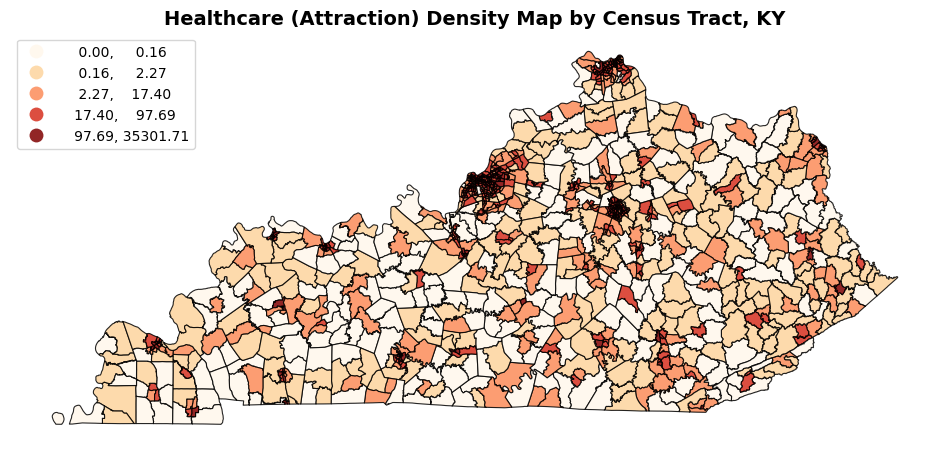

In [35]:
# Convert ALAND (land area) from square meters to square miles
merged_gdf["Land_Area_sq_miles"] = merged_gdf["ALAND"] / (1609.34 ** 2)

# Calculate CNS16 density per square mile
merged_gdf["CNS16_Density_per_sq_mile"] = merged_gdf["CNS16"] / merged_gdf["Land_Area_sq_miles"]

# Define the color scheme and classification method
color_scheme = "OrRd"  # Try: "magma", "cividis", "coolwarm", "OrRd", "YlGnBu"

# Create a choropleth density map with automatic quantile classification
fig, ax = plt.subplots(figsize=(12, 12))
merged_gdf.plot(
    column="CNS16_Density_per_sq_mile",
    cmap=color_scheme,
    legend=True,
    linewidth=0.8,
    edgecolor="black",
    alpha=0.85,
    ax=ax,
    scheme="quantiles",
    k=5,
    legend_kwds={"loc": "upper left"}  
)

# Set title and remove axis labels for a clean visualization
ax.set_title("Healthcare (Attraction) Density Map by Census Tract, KY", fontsize=14, fontweight="bold")
ax.axis("off")  # Hide axes for a cleaner map

# Show the map
plt.show()


## Load Data: Total Medical Visit (Production)

In [40]:
productions = pd.read_csv('production_new.csv')

In [41]:
productions

,tract_number,tract_name,Total Medical Visit
0,21001970100,"Adair County, Tract 970100",116.400718
1,21001970200,"Adair County, Tract 970200",130.701292
2,21001970300,"Adair County, Tract 970300",216.206251
3,21001970401,"Adair County, Tract 970401",301.566243
4,21001970402,"Adair County, Tract 970402",245.354618
...,...,...,...
1110,21239050106,"Woodford County, Tract 050106",245.115946
1111,21239050107,"Woodford County, Tract 050107",248.863732
1112,21239050200,"Woodford County, Tract 050200",282.790542
1113,21239050300,"Woodford County, Tract 050300",126.373998


In [42]:
# Reload production for visualization 
map_df = pd.read_csv('production_new.csv')
map_df

,tract_number,tract_name,Total Medical Visit
0,21001970100,"Adair County, Tract 970100",116.400718
1,21001970200,"Adair County, Tract 970200",130.701292
2,21001970300,"Adair County, Tract 970300",216.206251
3,21001970401,"Adair County, Tract 970401",301.566243
4,21001970402,"Adair County, Tract 970402",245.354618
...,...,...,...
1110,21239050106,"Woodford County, Tract 050106",245.115946
1111,21239050107,"Woodford County, Tract 050107",248.863732
1112,21239050200,"Woodford County, Tract 050200",282.790542
1113,21239050300,"Woodford County, Tract 050300",126.373998


In [43]:
production_trct = map_df.rename(columns={'tract_number': 'GEOID'})
production_trct

,GEOID,tract_name,Total Medical Visit
0,21001970100,"Adair County, Tract 970100",116.400718
1,21001970200,"Adair County, Tract 970200",130.701292
2,21001970300,"Adair County, Tract 970300",216.206251
3,21001970401,"Adair County, Tract 970401",301.566243
4,21001970402,"Adair County, Tract 970402",245.354618
...,...,...,...
1110,21239050106,"Woodford County, Tract 050106",245.115946
1111,21239050107,"Woodford County, Tract 050107",248.863732
1112,21239050200,"Woodford County, Tract 050200",282.790542
1113,21239050300,"Woodford County, Tract 050300",126.373998


In [44]:
# Convert GEOID to string in both datasets
gdf_shp["GEOID"] = gdf_shp["GEOID"].astype(str)
production_trct["GEOID"] = production_trct["GEOID"].astype(str)

In [45]:
# Merge the shapefile data with the medical visit data
merged_prod = gdf_shp.merge(production_trct, on="GEOID", how="left")
merged_prod

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,tract_name,Total Medical Visit
0,21,237,930200,21237930200,9302,Census Tract 9302,G5020,S,248131879,707264,+37.7406296,-083.5940784,"POLYGON ((-83.70797 37.71646, -83.70204 37.724...","Wolfe County, Tract 930200",285.134814
1,21,031,930300,21031930300,9303,Census Tract 9303,G5020,S,194557718,5686994,+37.2201287,-086.7365307,"POLYGON ((-86.85436 37.25474, -86.85424 37.254...","Butler County, Tract 930300",310.491134
2,21,031,930400,21031930400,9304,Census Tract 9304,G5020,S,218455330,1082205,+37.0872907,-086.7250544,"POLYGON ((-86.84134 37.05531, -86.84132 37.055...","Butler County, Tract 930400",116.078024
3,21,031,930200,21031930200,9302,Census Tract 9302,G5020,S,248312270,2862420,+37.2416585,-086.5195770,"POLYGON ((-86.66818 37.22558, -86.66821 37.226...","Butler County, Tract 930200",106.232729
4,21,031,930500,21031930500,9305,Census Tract 9305,G5020,S,208592384,2662267,+37.1576813,-086.8500520,"POLYGON ((-86.94494 37.07296, -86.94488 37.073...","Butler County, Tract 930500",82.268637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,21,195,931000,21195931000,9310,Census Tract 9310,G5020,S,70345477,0,+37.3137554,-082.4708692,"POLYGON ((-82.53754 37.26208, -82.53734 37.262...","Pike County, Tract 931000",147.476956
1111,21,195,930200,21195930200,9302,Census Tract 9302,G5020,S,129254353,5345,+37.5531372,-082.5485313,"POLYGON ((-82.62441 37.52102, -82.62135 37.526...","Pike County, Tract 930200",357.320090
1112,21,195,931600,21195931600,9316,Census Tract 9316,G5020,S,68228358,0,+37.5629802,-082.1925470,"POLYGON ((-82.24536 37.52614, -82.24473 37.527...","Pike County, Tract 931600",99.642072
1113,21,195,930400,21195930400,9304,Census Tract 9304,G5020,S,48576134,0,+37.4616900,-082.4810037,"POLYGON ((-82.53365 37.4708, -82.53364 37.4708...","Pike County, Tract 930400",183.396562


## Visualize Total Medical Visit on the map

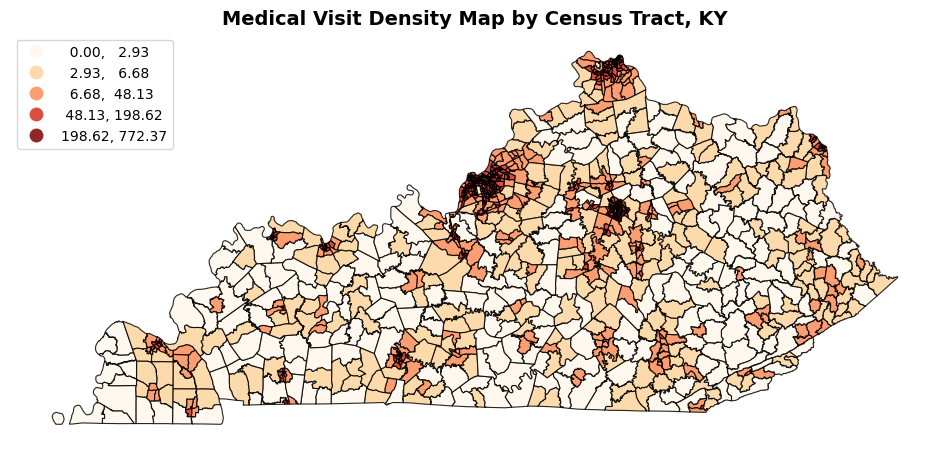

In [46]:
# Convert ALAND (land area) from square meters to square miles
merged_prod["Land_Area_sq_miles"] = merged_prod["ALAND"] / (1609.34 ** 2)

# Calculate CNS16 density per square mile
merged_prod["Medical_visit_Density_per_sq_mile"] = merged_prod["Total Medical Visit"] / merged_gdf["Land_Area_sq_miles"]

# Define the color scheme and classification method
color_scheme = "OrRd"  # Try: "magma", "cividis", "coolwarm", "OrRd", "YlGnBu"

# Create a choropleth density map with automatic quantile classification
fig, ax = plt.subplots(figsize=(12, 12))
merged_prod.plot(
    column="Medical_visit_Density_per_sq_mile",
    cmap=color_scheme,
    legend=True,
    linewidth=0.8,
    edgecolor="black",
    alpha=0.85,
    ax=ax,
    scheme="quantiles",
    k=5,
    legend_kwds={"loc": "upper left"}  
)

# Set title and remove axis labels for a clean visualization
ax.set_title("Medical Visit Density Map by Census Tract, KY", fontsize=14, fontweight="bold")
ax.axis("off")  # Hide axes for a cleaner map

# Show the map
plt.show()


In [47]:
# Save file as a csv
save_file = merged_gdf.to_csv('medical_visit_map.csv', index=False)

## Merge the WAC and Production dataset for Gravity Model

In [48]:
# Print WAC
grp_trct

,trct,trctname,CNS16,lat,long
0,21001970100,"9701 (Adair, KY)",0,37.235091,-85.158997
1,21001970200,"9702 (Adair, KY)",35,37.172349,-85.337815
2,21001970300,"9703 (Adair, KY)",5,37.128164,-85.156588
3,21001970401,"9704.01 (Adair, KY)",355,37.052371,-85.328457
4,21001970402,"9704.02 (Adair, KY)",220,37.122300,-85.276557
...,...,...,...,...,...
1110,21239050106,"501.06 (Woodford, KY)",101,38.021165,-84.687406
1111,21239050107,"501.07 (Woodford, KY)",54,38.044747,-84.687097
1112,21239050200,"502 (Woodford, KY)",26,37.960814,-84.732228
1113,21239050300,"503 (Woodford, KY)",5,38.098915,-84.773211


In [49]:
# Print Productions
productions

,tract_number,tract_name,Total Medical Visit
0,21001970100,"Adair County, Tract 970100",116.400718
1,21001970200,"Adair County, Tract 970200",130.701292
2,21001970300,"Adair County, Tract 970300",216.206251
3,21001970401,"Adair County, Tract 970401",301.566243
4,21001970402,"Adair County, Tract 970402",245.354618
...,...,...,...
1110,21239050106,"Woodford County, Tract 050106",245.115946
1111,21239050107,"Woodford County, Tract 050107",248.863732
1112,21239050200,"Woodford County, Tract 050200",282.790542
1113,21239050300,"Woodford County, Tract 050300",126.373998


In [53]:
# Convert trct to string in the datasets
grp_trct["trct"] = grp_trct["trct"].astype("int64")

C:\Users\Musa\AppData\Local\Temp\ipykernel_5792\1802029810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grp_trct["trct"] = grp_trct["trct"].astype("int64")


In [54]:
# Merge grp_trct with Productions on the corresponding columns, keeping all values intact from grp_trct
prodution_attraction = grp_trct.merge(productions, left_on='trct', right_on='tract_number', how='left')

prodution_attraction

,trct,trctname,CNS16,lat,long,tract_number,tract_name,Total Medical Visit
0,21001970100,"9701 (Adair, KY)",0,37.235091,-85.158997,21001970100,"Adair County, Tract 970100",116.400718
1,21001970200,"9702 (Adair, KY)",35,37.172349,-85.337815,21001970200,"Adair County, Tract 970200",130.701292
2,21001970300,"9703 (Adair, KY)",5,37.128164,-85.156588,21001970300,"Adair County, Tract 970300",216.206251
3,21001970401,"9704.01 (Adair, KY)",355,37.052371,-85.328457,21001970401,"Adair County, Tract 970401",301.566243
4,21001970402,"9704.02 (Adair, KY)",220,37.122300,-85.276557,21001970402,"Adair County, Tract 970402",245.354618
...,...,...,...,...,...,...,...,...
1110,21239050106,"501.06 (Woodford, KY)",101,38.021165,-84.687406,21239050106,"Woodford County, Tract 050106",245.115946
1111,21239050107,"501.07 (Woodford, KY)",54,38.044747,-84.687097,21239050107,"Woodford County, Tract 050107",248.863732
1112,21239050200,"502 (Woodford, KY)",26,37.960814,-84.732228,21239050200,"Woodford County, Tract 050200",282.790542
1113,21239050300,"503 (Woodford, KY)",5,38.098915,-84.773211,21239050300,"Woodford County, Tract 050300",126.373998


In [55]:
# Save file as a csv
save_file = prodution_attraction.to_csv('prodution_attraction.csv', index=False)